In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# import plotly.express as px 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            precision_score,
                            recall_score,
                            roc_auc_score,
                            plot_roc_curve)

### Reading in data 

In [54]:
mass = pd.read_csv('../data/mass_mobile.csv')
mass.head(2)

,Unnamed: 0,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,...,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration
0,0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,...,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.0,-0.8176,1
1,1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,...,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.0,0.0000,1


### Creating `mass_no_country` DataFrame

In [55]:
mass.drop(columns=['Unnamed: 0'], inplace=True)

In [56]:
mass_no_country = mass.copy()

In [57]:
mass_no_country = mass_no_country.drop(columns=[ 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Czechoslovakia',
 'country_Denmark',
 'country_Djibouti',
 'country_Dominican Republic',
 'country_Ecuador',
 'country_Egypt',
 'country_El Salvador',
 'country_Equatorial Guinea',
 'country_Eritrea',
 'country_Estonia',
 'country_Ethiopia',
 'country_Finland',
 'country_France',
 'country_Gabon',
 'country_Gambia',
 'country_Georgia',
 'country_Germany',
 'country_Germany East',
 'country_Germany West',
 'country_Ghana',
 'country_Greece',
 'country_Guatemala',
 'country_Guinea',
 'country_Guinea-Bissau',
 'country_Guyana',
 'country_Haiti',
 'country_Honduras',
 'country_Hungary',
 'country_India',
 'country_Indonesia',
 'country_Iran',
 'country_Iraq',
 'country_Ireland',
 'country_Italy',
 'country_Ivory Coast',
 'country_Jamaica',
 'country_Japan',
 'country_Jordan',
 'country_Kazakhstan',
 'country_Kenya',
 'country_Kosovo',
 'country_Kuwait',
 'country_Kyrgyzstan',
 'country_Laos',
 'country_Latvia',
 'country_Lebanon',
 'country_Lesotho',
 'country_Liberia',
 'country_Libya',
 'country_Lithuania',
 'country_Luxembourg',
 'country_Macedonia',
 'country_Madagascar',
 'country_Malawi',
 'country_Malaysia',
 'country_Mali',
 'country_Mauritania',
 'country_Mauritius',
 'country_Mexico',
 'country_Moldova',
 'country_Mongolia',
 'country_Montenegro',
 'country_Morocco',
 'country_Mozambique',
 'country_Myanmar',
 'country_Namibia',
 'country_Nepal',
 'country_Netherlands',
 'country_Nicaragua',
 'country_Niger',
 'country_Nigeria',
 'country_North Korea',
 'country_Norway',
 'country_Oman',
 'country_Pakistan',
 'country_Panama',
 'country_Papua New Guinea',
 'country_Paraguay',
 'country_Peru',
 'country_Philippines',
 'country_Poland',
 'country_Portugal',
 'country_Qatar',
 'country_Romania',
 'country_Russia',
 'country_Rwanda',
 'country_Saudi Arabia',
 'country_Senegal',
 'country_Serbia',
 'country_Serbia and Montenegro',
 'country_Sierra Leone',
 'country_Singapore',
 'country_Slovak Republic',
 'country_Slovenia',
 'country_Somalia',
 'country_South Africa',
 'country_South Korea',
 'country_South Sudan',
 'country_Spain',
 'country_Sri Lanka',
 'country_Sudan',
 'country_Suriname',
 'country_Swaziland',
 'country_Sweden',
 'country_Switzerland',
 'country_Syria',
 'country_Taiwan',
 'country_Tajikistan',
 'country_Tanzania',
 'country_Thailand',
 'country_Timor Leste',
 'country_Togo',
 'country_Tunisia',
 'country_Turkey',
 'country_Turkmenistan',
 'country_USSR',
 'country_Uganda',
 'country_Ukraine',
 'country_United Arab Emirate',
 'country_United Kingdom',
 'country_Uruguay',
 'country_Uzbekistan',
 'country_Venezuela',
 'country_Vietnam',
 'country_Yemen',
 'country_Yugoslavia',
 'country_Zambia',
 'country_Zimbabwe' ])

### Adding `violent_response` column 

In [59]:
mass_no_country['violent_response'] = 0 
mass_no_country.loc[mass_no_country['beatings'] == 1, 'violent_response'] = 1
mass_no_country.loc[mass_no_country['shootings'] == 1, 'violent_response'] = 1
mass_no_country.loc[mass_no_country['killings'] == 1, 'violent_response'] = 1

In [60]:
# mass_no_country.drop(columns=['beatings', 'killings', 'shootings'], inplace=True)

In [61]:
mass_no_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15179 entries, 0 to 15178
Data columns (total 70 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     15179 non-null  int64  
 1   country                                15179 non-null  object 
 2   ccode                                  15179 non-null  int64  
 3   region                                 15179 non-null  object 
 4   protestnumber                          15179 non-null  int64  
 5   protesterviolence                      15179 non-null  float64
 6   location                               15158 non-null  object 
 7   protesteridentity                      15179 non-null  object 
 8   sources                                15175 non-null  object 
 9   notes                                  15179 non-null  object 
 10  protester_id_type                      15179 non-null  object 
 11  pa

### Saving CSV 

Below, saving again `mass_no_country` as `mass_for_modeling` with the following columns: 
+ `violent_response` added 
+ all countries dropped 
+ NO prediction columns 

In [21]:
# mass_no_country.to_csv('../data/mass_for_modeling.csv')

In [62]:
def evaluate_model(y_true, y_preds):
    
    f1 = f1_score(y_true, y_preds)
    
    precision = precision_score(y_true, y_preds)
    
    recall = recall_score(y_true, y_preds)
    
    accuracy = accuracy_score(y_true, y_preds)

    return f1, precision, recall, accuracy

_Note: I am not yet using the `response_prediction_columns` function and have commented it out from `state_response_predictor` function. 

In [129]:
def response_prediction_columns(model, df, features):
    
    ss = StandardScaler()
    
    X = features
    X_sc = ss.fit_transform(X)
    
    predicted_column = model.predict(X_sc)
    probability_column = model.predict_proba(X_sc)[:,1]
    
    return predicted_column, probability_column

In [130]:
def state_response_predictor(df, features, target, model):
    
    X = features 
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()

    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    model.fit(X_train_sc, y_train)
    
    y_preds_train = model.predict(X_train_sc)
    y_preds_test = model.predict(X_test_sc)
    
    predicted_probs = model.predict_proba(X_test_sc)

    f1_score_train, precision_train, recall_train, accuracy_train = evaluate_model(y_train, y_preds_train)
    f1_score_test, precision_test, recall_test, accuracy_test = evaluate_model(y_test, y_preds_test)
    
    print(f'{target}: F1_score for train set = {f1_score_train}')
    print(f'{target}: F1_score for test set = {f1_score_test}')
    print(f'{target}: Precision for train set = {precision_train}')
    print(f'{target}: Precision for test set = {precision_test}')
    print(f'{target}: Recall for train set = {recall_train}')
    print(f'{target}: Recall for test set = {recall_test}')
    print(f'{target}: Accuracy for train set = {accuracy_train}')
    print(f'{target}: Accuracy for test set = {accuracy_test}')
    
#     predicted_column, probability_column = response_prediction_columns(model, df, features)
                                                                                              
    # confusion_matrix 
    cf_matrix = plot_confusion_matrix(model, X_test_sc, y_test, cmap='Blues', display_labels=[f'Not {target}', f'{target}'])
    
    # ROC/AUC 
    roc_auc = roc_auc_score(y_test, predicted_probs[:,1])
    roc_curve = plot_roc_curve(model, X_test_sc, y_test)
    
    print(f'{target}: ROC/AUC = {roc_auc}')

#     return (predicted_column, probability_column, f1_score_train, f1_score_test, precision_train, precision_test,
#             recall_train, recall_test, accuracy_train, accuracy_test, cf_matrix, X_train) 

    return (model, X_train, f1_score_train, f1_score_test, precision_train, precision_test, 
            recall_train, recall_test, accuracy_train, accuracy_test)

### Identifying `features` to use in Logistic Regressions

In [115]:
features = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings', 
           'partipants_number','pop_male', 'pop_female', 'violent_response', 'protest_duration'])

### Running `state_response_predictor` function on each target using hyperparameters identified from GridSearch 

#### **_1. Arrests_**

arrests: F1_score for train set = 0.0
arrests: F1_score for test set = 0.0
arrests: Precision for train set = 0.0
arrests: Precision for test set = 0.0
arrests: Recall for train set = 0.0
arrests: Recall for test set = 0.0
arrests: Accuracy for train set = 0.8581075516758626
arrests: Accuracy for test set = 0.8616600790513834
arrests: ROC/AUC = 0.7324095310907237


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


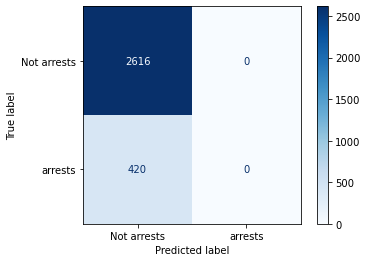

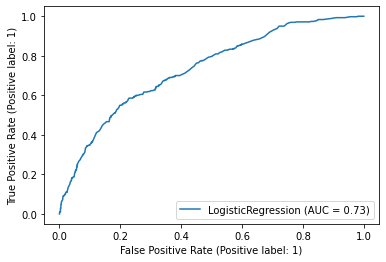

In [116]:
logreg_arr = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

model_arr, X_train_arr, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'arrests', logreg_arr)

In [117]:
logreg_arr.coef_

array([[-0.01274276,  0.53135333,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.04585509,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.02991009,
        -0.02155347,  0.        ,  0.        ,  0.        ,  0.08323412,
         0.        ,  0.01706609, -0.09215279,  0.        ,  0.        ,
         0.01474829,  0.        ,  0.0548773 ,  0.        ,  0.        ]])

In [118]:
arr_coef = pd.DataFrame(list(zip(X_train_arr.columns, logreg_arr.coef_[0])), columns=['feature', 'coef'])
arr_coef

,feature,coef
0,protestnumber,-0.012743
1,protesterviolence,0.531353
2,pop_total,0.000000
3,pop_density,0.000000
4,prosperity_2020,0.000000
5,region_Africa,0.000000
6,region_Asia,0.000000
7,region_Central America,0.000000
8,region_Europe,0.000000
9,region_MENA,0.000000


#### **_2. Accomodation_**

accomodation: F1_score for train set = 0.0032520325203252032
accomodation: F1_score for test set = 0.0
accomodation: Precision for train set = 0.5
accomodation: Precision for test set = 0.0
accomodation: Recall for train set = 0.0016313213703099511
accomodation: Recall for test set = 0.0
accomodation: Accuracy for train set = 0.8990364819237421
accomodation: Accuracy for test set = 0.902832674571805
accomodation: ROC/AUC = 0.6491556341555414


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


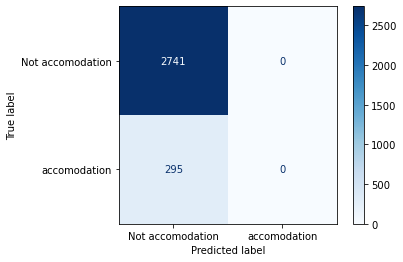

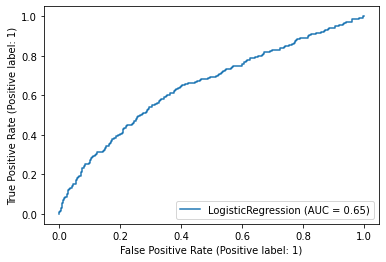

In [121]:
logreg_acc = LogisticRegression(C=0.01, max_iter=100, penalty='l2', solver='liblinear')

model_acc, X_train_acc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'accomodation', logreg_acc)

In [122]:
acc_coef = pd.DataFrame(list(zip(X_train_acc.columns, logreg_acc.coef_[0])), columns=['feature', 'importance'])
acc_coef

,feature,importance
0,protestnumber,0.001591
1,protesterviolence,0.015931
2,pop_total,0.054689
3,pop_density,-0.092286
4,prosperity_2020,-0.073945
5,region_Africa,0.056958
6,region_Asia,0.080130
7,region_Central America,-0.049861
8,region_Europe,-0.081822
9,region_MENA,-0.057370


#### **_3. Crowd Dispersal_**

crowddispersal: F1_score for train set = 0.636712640409498
crowddispersal: F1_score for test set = 0.6266901822457378
crowddispersal: Precision for train set = 0.6962064676616916
crowddispersal: Precision for test set = 0.7013157894736842
crowddispersal: Recall for train set = 0.5865863243384857
crowddispersal: Recall for test set = 0.5664187035069076
crowddispersal: Accuracy for train set = 0.7895907106975212
crowddispersal: Accuracy for test set = 0.7908432147562582
crowddispersal: ROC/AUC = 0.7962316024946801


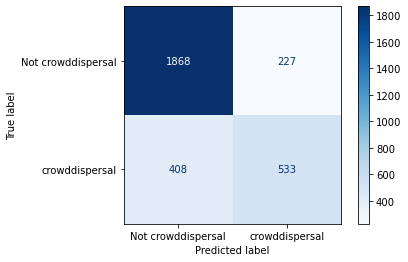

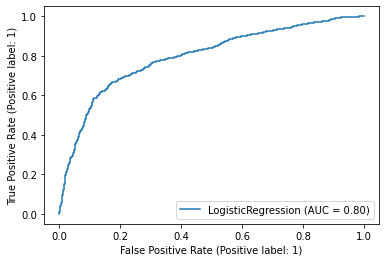

In [123]:
logreg_cd = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

model_cd, X_train_cd, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'crowddispersal', logreg_cd)

In [124]:
cd_coef = pd.DataFrame(list(zip(X_train_cd.columns, logreg_cd.coef_[0])), columns=['feature', 'coef'])
cd_coef

,feature,coef
0,protestnumber,0.015851
1,protesterviolence,0.962889
2,pop_total,0.000000
3,pop_density,0.058562
4,prosperity_2020,-0.096369
5,region_Africa,0.135102
6,region_Asia,0.000000
7,region_Central America,0.000000
8,region_Europe,0.000000
9,region_MENA,0.005691


#### **_4. Ignore_**

ignore: F1_score for train set = 0.7855041454934474
ignore: F1_score for test set = 0.7898627243928193
ignore: Precision for train set = 0.7020437432771602
ignore: Precision for test set = 0.7030075187969925
ignore: Recall for train set = 0.8914858096828047
ignore: Recall for test set = 0.9012048192771084
ignore: Accuracy for train set = 0.7358148727662027
ignore: Accuracy for test set = 0.7378129117259552
ignore: ROC/AUC = 0.7842423472961614


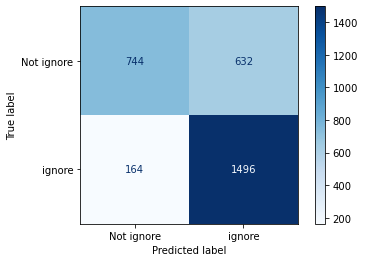

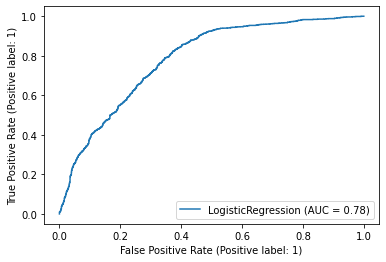

In [126]:
logreg_ig = LogisticRegression(C=0.01, max_iter=1000, penalty='l2', solver='saga')

model_ig, X_train_ig, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'ignore', logreg_ig)

In [87]:
ig_coef = pd.DataFrame(list(zip(X_train_ig.columns, logreg_ig.coef_[0])), columns=['feature', 'coef'])
ig_coef

,feature,coef
0,protestnumber,0.014093
1,protesterviolence,-1.026144
2,pop_total,-0.111241
3,pop_density,-0.031919
4,prosperity_2020,0.213891
5,region_Africa,-0.051823
6,region_Asia,0.005504
7,region_Central America,0.075412
8,region_Europe,0.090000
9,region_MENA,-0.108559


#### **_5. Violent Response_**

_Violent responses includes beatings, shootings, and killings as recorded in to the Mass Mobilization dataset._

violent_response: F1_score for train set = 0.17827298050139279
violent_response: F1_score for test set = 0.23665893271461716
violent_response: Precision for train set = 0.6201550387596899
violent_response: Precision for test set = 0.6710526315789473
violent_response: Recall for train set = 0.10409889394925179
violent_response: Recall for test set = 0.14366197183098592
violent_response: Accuracy for train set = 0.8785308408136375
violent_response: Accuracy for test set = 0.8916337285902504
violent_response: ROC/AUC = 0.8373699113742509


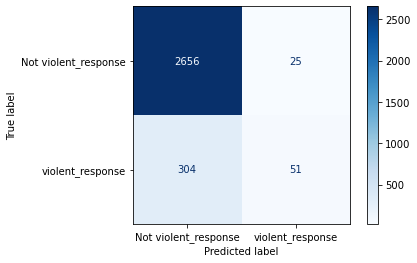

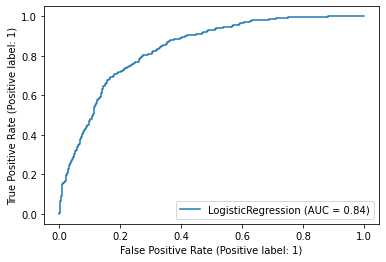

In [127]:
logreg_vr = LogisticRegression(C=0.01, max_iter=100, penalty='l2', solver='saga')

model_vr, X_train_vr, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_tet = state_response_predictor(mass_no_country, features, 'violent_response', logreg_vr)

In [128]:
vr_coef = pd.DataFrame(list(zip(X_train_vr.columns, logreg_vr.coef_[0])), columns=['feature', 'coef'])
vr_coef

,feature,coef
0,protestnumber,-0.116399
1,protesterviolence,0.762556
2,pop_total,0.096300
3,pop_density,-0.060932
4,prosperity_2020,-0.459709
5,region_Africa,0.098876
6,region_Asia,0.103779
7,region_Central America,0.036225
8,region_Europe,-0.200388
9,region_MENA,0.172005
